# 1.1 Обычное разделение данных на обучающую и тестовую выборки

In [1]:
# Проблемы при простом разбиении данных на обучающую и тестовую выборки

# Однобокая проверка: 
# Разовое разбиение на обучающую и тестовую выборки может привести к тому, 
# что модель будет проверена на одном и том же наборе данных, что может не отражать её истинную производительность 
# на новых, не известных ей данных. Таким образом, результаты могут быть случайными и не всегда репрезентативными.

# Повезёт/не повезёт: 
# Результаты оценки модели зависят от конкретного разбиения данных. 
# Если данные случайно разбиваются на неудачные обучающие и тестовые выборки, это может значительно исказить оценку модели, 
# приводя к переоценке или недооценке её производительности.

# Мало данных - мало толку: 
# При малом объеме данных train_test_split может оставить слишком мало данных для обучения или тестирования, 
# что снижает достоверность результатов. В таких случаях может быть сложно оценить истинное качество модели.

# Неравномерное распределение: 
# При разовом разбиении данные могут быть распределены неравномерно, особенно если выборка небольшая, 
# что может привести к несбалансированности классов или признаков в обучающих и тестовых наборах.

In [2]:
# Для примера возьмём достаточно известный в среде аналитиков и датасаентистов набор данных о цветках ириса. 
# Этот набор данных включен в модуль datasets библиотеки scikit-learn.

from sklearn.datasets import load_iris
import pandas as pd

# Загрузка данных
iris = load_iris()

# Создание DataFrame из данных и добавление меток классов
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Добавление столбца с метками классов
df['target'] = iris.target

# Просмотр первых строк DataFrame
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


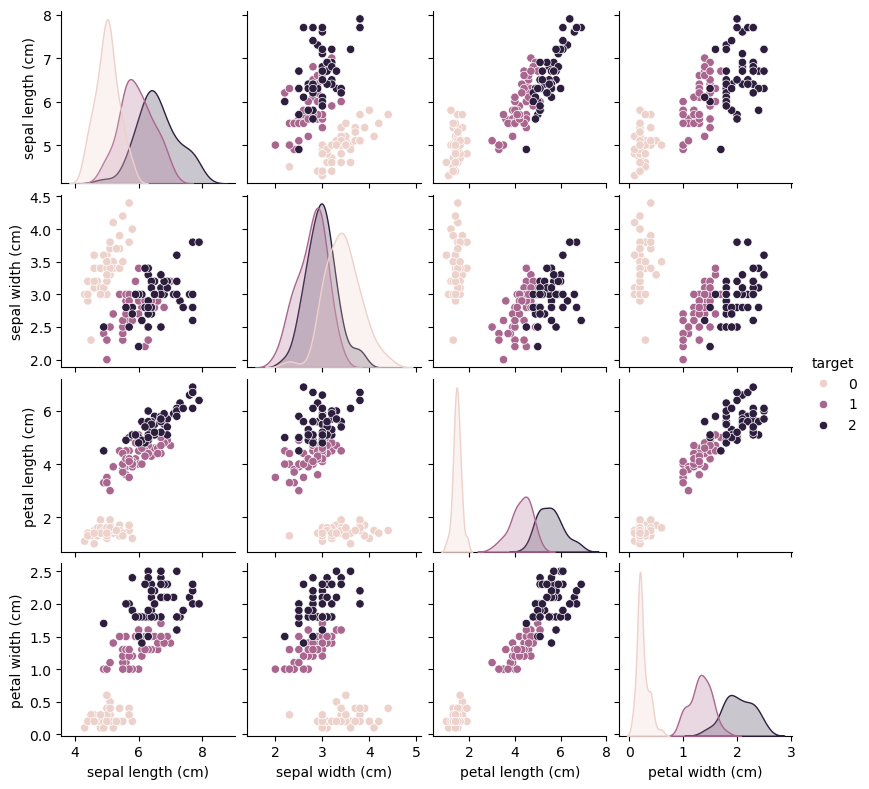

In [4]:
# Посмотрим также на визуальное распределение данных:

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df, hue='target', height=2)
plt.show();

In [5]:
# Датасет 'iris' как раз-таки может продемонстрировать проблемы, возникающие при стандартном разбиении.

# Посмотрим на распределение данных в этом датасете в колонке 'target':

df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
# Особенность этого датасета в том, что он имеет равное количество значений каждого класса. 
# Причём данные распределены по порядку: 
# сначала представлены все цветки вида 'setosa', за ними следуют 'versicolor', а завершает набор 'virginica'.

# Давайте сделаем разбиение данных на обучающую и тестовые выборки без перемешивания данных shuffle=False:

from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [7]:
# Посмотрим на распределение целевой переменной в полученных выборках:

print(y_train.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2]


In [8]:
print(y_test.values)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [9]:
# Как мы можем заметить, в обучающей выборке у нас мало представителей вида 'virginica' (2), 
# а тестовая выборка, наоборот, полностью состоит из цветков этого вида.

# Теперь сделаем обучение модели логистической регрессии и посмотрим на результат:

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)
print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

Правильность предсказаний на тестовом наборе: 0.76


In [10]:
# Понятно, что в данном случае мы бы использовали функцию train_test_split() с перемешиванием данных shuffle=True. 
# Если сделаем разбиение на обучающие и тестовые выборки с перемешиванием (что применено в функции train_test_split() по умолчанию) 
# и посмотрим на качество предсказаний модели логистической регрессии, то получим более качественно обученную модель:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

model_lr = LogisticRegression(max_iter=200)

model_lr.fit(X_train, y_train)

print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

Правильность предсказаний на тестовом наборе: 0.97


In [11]:
# Однако перемешивание данных не устраняет всех потенциальных проблем, связанных с разбиением выборок. 
# В наборе данных про ирисы присутствуют три класса цветков в определённой пропорции, 
# и простое перемешивание данных при их разбиении не гарантирует нам, 
# что в тренировочной и тестовой выборках будут соблюдены эти пропорции.

In [12]:
# В функции train_test_split() проблема соблюдения пропорций классов
# при делении данных на обучающие и тестовые выборки решается при помощи параметра stratify. 
# Применим этот параметр для нашего примера и посмотрим на качество предсказаний модели логистической регрессии:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=12345, stratify=y)

model_lr = LogisticRegression(max_iter=200)

model_lr.fit(X_train, y_train)

print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

Правильность предсказаний на тестовом наборе: 1.00


In [13]:
# На первый взгляд, результат кажется впечатляющим - 100 процентная точность предсказаний. 
# Однако, если мы изменим значение параметра random_state, 
# отвечающего за воспроизводимость результата, на другое число, то получим:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, stratify=y)

model_lr = LogisticRegression(max_iter=200)

model_lr.fit(X_train, y_train)

print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

# Оценка качества модели у нас сильно "гуляет" от случая к случаю.

Правильность предсказаний на тестовом наборе: 0.95


In [14]:
# Давайте взглянем еще раз на график распределения данных в датасете 'iris'. 
# Как можем заметить, цветки вида 'setosa' (0) достаточно хорошо отделяются от двух других видов. 
# А вот с цветками видов 'versicolor' (1) и 'virginica' (2) не всё так однозначно.  
# Часть образцов хорошо отделяются друг от друга, но некоторые образцы находятся в зоне пересечения двух видов и достаточно сложно идентифицируются.

# А теперь представьте, что, например, при разделении данных сложно идентифицируемые образцы попадут преимущественно в обучающую выборку, 
# а легко идентифицируемые - в тестовую. В этом случае модели будет сложно качественно обучиться, и мы получим недообученную модель.

# И здесь мы нащупываем "потолок" возможностей применения функции train_test_split().

# 1.1 Перекрёстная проверка (cross-validation)

In [15]:
# Перекрёстная проверка (cross-validation)

# Перекрёстная проверка - это статистический метод оценки обобщающей способности моделей, 
# который отличается большей устойчивостью и надёжностью по сравнению с обычным разбиением данных на обучающие и тестовые выборки. 
# В этом подходе данные делятся на несколько частей, и строится несколько моделей, что позволяет более точно оценить их производительность.

In [16]:
# Наиболее популярной разновидностью перекрёстной проверки является k-блочная кросс-валидация (k-fold cross-validation), 
# где k - это заданное пользователем количество блоков.

# Например, при использовании пятиблочной перекрёстной проверки, данные разбиваются на пять примерно равных по размеру частей, называемых блоками (folds).

# Далее поочерёдно строятся модели: 
# первая модель обучается на четырёх блоках 2-5, а первый блок используется как тестовый набор. 
# На данных из блока 1 оценивается точность модели, обученной на блоках 2-5.

# Затем строится вторая модель, где блок 2 выступает тестовым, а блоки 1, 3, 4 и 5 - обучающими. 

# Этот процесс повторяется, пока каждый блок не окажется в роли тестового набора. 

# В итоге, после пяти таких разбиений (splits) мы получаем пять значений точности модели. 
# Эти значения дают более полное представление о её способности обобщать на новых данных.

# Процесс пятиблочной кросс-валидации наглядно представлен ниже, где показано, как каждый из блоков поочерёдно выполняет роль тестовой выборки, а оставшиеся блоки - обучающих.

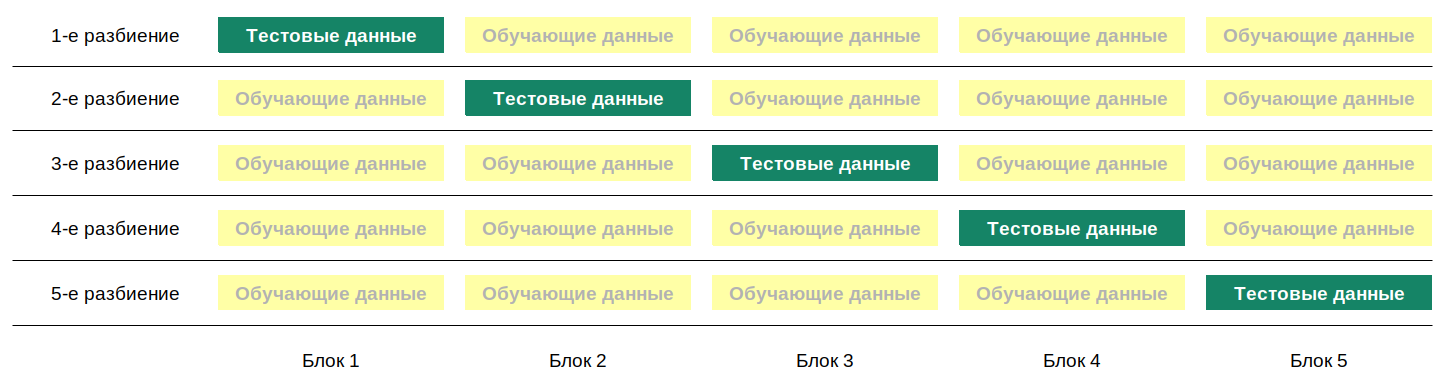

# 1.2 cross_val_score()

In [17]:
# В библиотеке scikit-learn перекрёстная проверка реализуется при помощи функции cross_val_score() из модуля model_selection. 
# Основными аргументами этой функции выступают модель для оценки, обучающие данные и истинные метки.

# Чтобы можно было использовать функцию cross_val_score(), её сначала нужно импортировать следующей командой:

# from sklearn.model_selection import cross_val_score

In [18]:
display(df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


X = df.drop('target', axis=1)
y = df['target']

model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

# По умолчанию cross_val_score() выполняет пятиблочную кросс-валидацию, 
# возвращая пять значений правильности проверки. 

Значения правильности предсказаний перекрёстной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [20]:
# За изменение количества блоков перекрёстной проверки в функции cross_val_score() отвечает параметр cv. 
# Например, увеличим количество блоков до 10:

model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, cv=10)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

Значения правильности предсказаний перекрёстной проверки: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [21]:
# Наиболее распространённым способом подвести итог точности, полученной в ходе кросс-валидации, является расчет среднего значения:

print("Средняя оценка качества моделей: {:.2f}".format(scores.mean()))

Средняя оценка качества моделей: 0.97


In [22]:
# В нашем примере средняя правильность, рассчитанная по результатам кросс-валидации, указывает, 
# что модель в среднем достигает около 97% правильности.

# Однако, посмотрев на все десять значений правильности, выявленных в процессе десятиблочной кросс-валидации, 
# можно заметить некоторый разброс результатов: от 93% до 100%. 
# Это может свидетельствовать о том, что модель значительно зависит от конкретных блоков данных, 
# использованных для обучения, либо же такой разброс обусловлен небольшим объемом набора данных, 
# что затрудняет её способность к обобщению результатов.

In [23]:
model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, cv=3)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

# Дело в том, что по умолчанию cross_val_score() выполняет обычную перекрёстную проверку (KFold) без стратификации. 
# Однако, если выполняется задача классификатором (задача классификации), и метки классов предоставлены, 
# то вместо обычного разбиения используется стратифицированная кросс-валидация (StratifiedKFold).

# В стратифицированной перекрёстной проверке данные разбиваются таким образом, 
# чтобы пропорции классов в каждом блоке в точности соответствовали пропорциям классов в наборе данных. 
# Демонстрация стандартной и стратифицированной перекрёстных проверок схематично показана ниже

Значения правильности предсказаний перекрёстной проверки: [0.98 0.96 0.98]


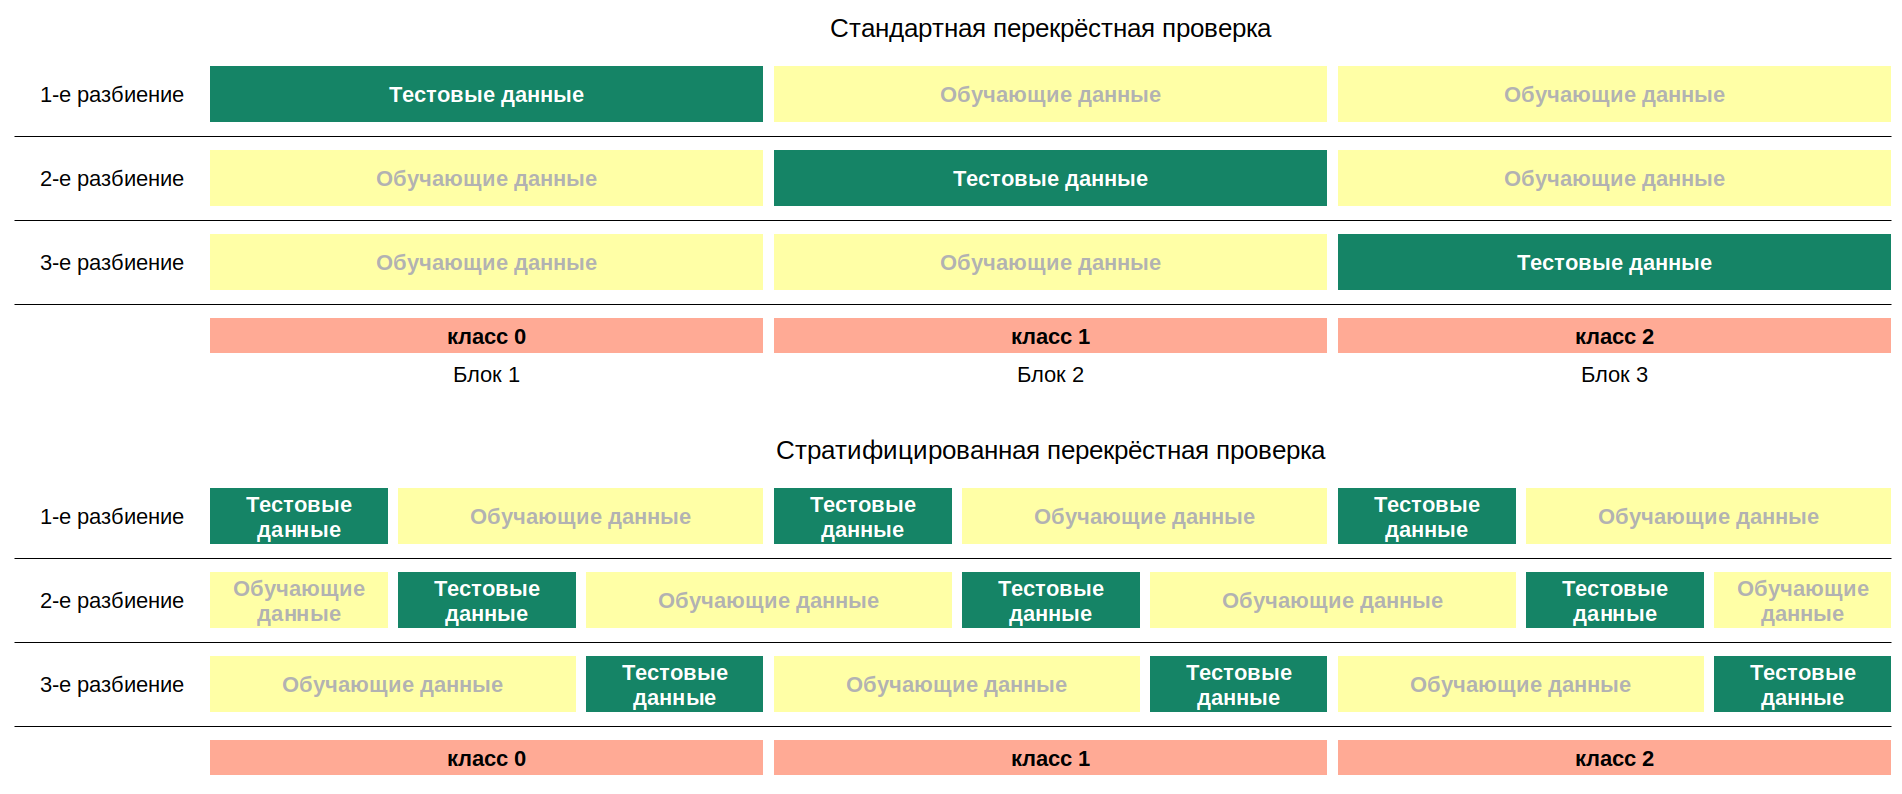

In [24]:
# Например, если 80% примеров относятся к классу А, а оставшиеся 20% - к классу В, 
# то при стратифицированной кросс-валидации каждый блок будет сформирован так, 
# чтобы сохранять те же пропорции: 80% примеров класса А и 20% - класса В.

In [25]:
# Если мы в нашем примере принудительно укажем, чтобы при проведении перекрёстной проверки использовалась k-fold кросс-валидация, 
# то тогда, из-за "особенностей" датасета 'iris', мы получим нулевые значения правильности моделей:

from sklearn.model_selection import KFold

cv = KFold(n_splits=3)
model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, cv=cv)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

Значения правильности предсказаний перекрёстной проверки: [0. 0. 0.]


## Параметр verbose функции cross_val_score()

In [26]:
# Параметр verbose в функции cross_val_score() используется для управления уровнем детализации вывода информации 
# о процессе выполнения перекрёстной проверки.
 
# Он помогает отслеживать прогресс выполнения, особенно при работе с большими данными 
# или при использовании сложных моделей, где время вычислений может быть значительным.

# Параметр verbose принимает целочисленные значения. 
# По умолчанию verbose=0, - при этом никакая информация о ходе выполнения кросс-валидации не выводится.

# verbose > 0 - увеличивает уровень детализации вывода. 
# Чем больше значение, тем больше информации выводится, например, 
# может отображаться прогресс по каждой итерации, по каждому подмножеству данных и так далее.

In [27]:
display(df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop('target', axis=1)
y = df['target']

model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [29]:
model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, verbose=3)

[CV] END ................................ score: (test=0.967) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.933) total time=   0.0s
[CV] END ................................ score: (test=0.967) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s


In [30]:
# Так как датасет по объёму данных маленький, то время выполнения итераций близко к нулю в секундах.

# Использование параметра verbose становится особенно ценным при длительных вычислениях, 
# поскольку оно позволяет наблюдать за ходом процесса, предоставляя уверенность в его исполнении и возможность отслеживать прогресс. 
# Это не только облегчает отладку, но и даёт более глубокое понимание производительности модели на каждом этапе кросс-валидации.

## Параметр scoring функции cross_val_score()

In [31]:
# Параметр scoring в функции cross_val_score() определяет, какую метрику оценки будет использовать функция 
# для измерения производительности модели на каждом шаге кросс-валидации. 

# Этот параметр позволяет гибко адаптировать оценку модели в зависимости от типа задачи 
# (классификация, регрессия и др.) и специфических требований к оценке.

In [32]:
# Значения, которые может принимать параметр scoring:

# Строка (имя метрики): 
# Используется одно из стандартных имен метрик, поддерживаемых scikit-learn, 
# например, 'accuracy', 'precision', 'recall', 'f1' для классификации, и 
# 'r2', 'neg_mean_squared_error' для регрессии.

# Функция: 
# Можно передать свою собственную функцию оценки, которая принимает два аргумента: 
# истинные значения и предсказанные значения, и возвращает оценку.

# Объект scorer из библиотеки scikit-learn: 
# Можно передать заранее созданный объект оценщика (scorer), используя функцию make_scorer().

In [33]:
# По умолчанию, для задач классификации используется метрика 'accuracy', 
# а для задач регрессии - метрика 'r2'.

In [34]:
# Также можно использовать метрики, которые начинаются с 'neg_' (например, 'neg_mean_squared_error').

In [35]:
# Давайте сделаем отступление и поговорим почему neg_?

# В машинном обучении метрики обычно делятся на те, которые нужно максимизировать (например, точность, F1-score) 
# и те, которые нужно минимизировать (например, ошибки - Mean Squared Error (MSE), Mean Absolute Error (MAE)).

# Метрики ошибок, такие как MSE (среднеквадратическая ошибка), нужно минимизировать, 
# так как они измеряют насколько предсказания модели отличаются от истинных значений.

# У кросс-валидации с функцией cross_val_score(), наоборот, цель - максимизировать метрику. 
# Это означает, что чем выше значение метрики, тем лучше считается модель.

# Соответственно, при кросс-валидации для метрик ошибок необходимо превратить задачу минимизации в задачу максимизации. 
# Чтобы кросс-валидация могла использовать метрики ошибок, в scikit-learn введены отрицательные версии метрик ошибок. 

# Метрики с 'neg_', такие как 'neg_mean_squared_error', просто берут метрику ошибки и делают её отрицательной. 
# Например, если MSE = 5, то 'neg_mean_squared_error' будет -5.

# Когда мы используем 'neg_mean_squared_error', функция кросс-валидации будет пытаться максимизировать это отрицательное значение. 
# Максимизация значения -5 (вместо -10) эквивалентна минимизации MSE (5 вместо 10). 
# Таким образом, мы достигаем нужного эффекта минимизации ошибки, но через максимизацию отрицательного значения.

In [36]:
# Для примера, при помощи функции make_regression() модуля sklearn.datasets 
# создадим синтетический набор данных следующим образом:

from sklearn.datasets import make_regression

# Генерируем набор данных для регрессии со 100 образцами и 2 признаками
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=12345)

In [37]:
# Функция make_regression() библиотеки scikit-learn используется для генерации синтетических данных для задач регрессии.

# Вот что происходит в этом коде:

# n_samples=100: Генерируется 100 образцов данных (строк). 
# Это количество наблюдений в наборе данных.

# n_features=2: Каждый образец будет иметь 2 признака (столбца). 
# Это количество независимых переменных или входных параметров для регрессии.

# noise=10: Добавляется случайный шум с дисперсией (ошибкой) 10 к данным, чтобы сделать задачу более реалистичной. 
# Это моделирует наличие ошибок измерений или других источников неопределённости в реальных данных.

# random_state=12345: Устанавливает начальное значение генератора случайных чисел 
# для обеспечения воспроизводимости результатов, - при каждом запуске кода будут генерироваться одинаковые данные.

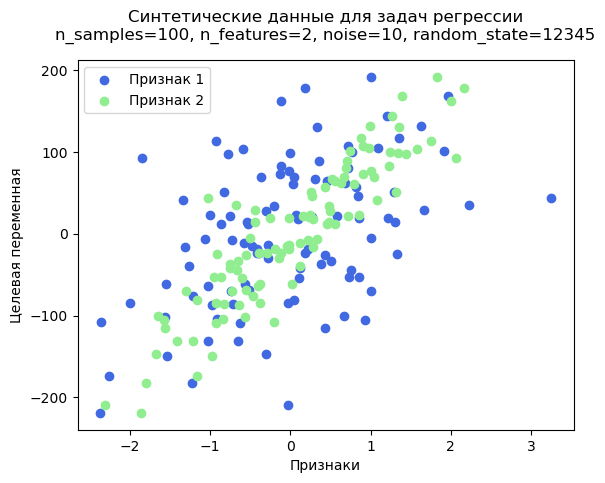

In [38]:
# Графически отобразим получившееся распределение данных при помощи библиотеки matplotlib:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y, color='royalblue', label='Признак 1')
plt.scatter(X[:, 1], y, color='lightgreen', label='Признак 2')
plt.xlabel('Признаки')
plt.ylabel('Целевая переменная')
plt.title('Синтетические данные для задач регрессии\nn_samples=100, n_features=2, noise=10, random_state=12345',
           pad=15)
plt.legend()
plt.show();

In [39]:
# Теперь посмотрим, какими окажутся значения среднеквадратической ошибки для модели линейной регрессии:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Инициализируем модель
model = LinearRegression()

# Используем отрицательную среднеквадратическую ошибку
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

print(scores)

# Как и ожидалось, модель выдала отрицательные значения MSE.

[-111.47893199 -115.17200867 -120.40186459  -84.24207792  -77.90679052]


In [40]:
# Итак, параметр scoring позволяет гибко настраивать процесс кросс-валидации под конкретные требования к оценке модели, 
# делая её результаты более интерпретируемыми и соответствующими целям анализа.

## Параметр n_jobs функции cross_val_score()

In [41]:
# Параметр n_jobs функции cross_val_score() определяет количество параллельных процессов (или потоков), 
# которые будут использоваться для выполнения перекрёстной проверки. 
# Этот параметр позволяет ускорить вычисления, распределяя работу по нескольким ядрам процессора.

In [42]:
# Значения параметра n_jobs:

# n_jobs=1 или None (по умолчанию): 
# Кросс-валидация выполняется последовательно, то есть все итерации обрабатываются поочерёдно одним процессом. 
# Это минимальная нагрузка на систему, но также и самый медленный вариант.

# n_jobs=-1: 
# Используются все доступные процессоры, их ядра и потоки на вашем компьютере. 
# Это максимизирует производительность за счёт полной загрузки всех ядер процессора, 
# что обычно значительно ускоряет выполнение задачи, особенно для больших наборов данных или моделей с долгим временем обучения.

# n_jobs=<положительное целое число>: 
# Указывает точное количество процессов, которые будут задействованы. 
# Например, n_jobs=2 задействует два процесса независимо от того, сколько ядер доступно в системе. 
# Это может быть полезно для частичного увеличения производительности, чтобы не перегружать систему полностью.

In [43]:
# Для того, чтобы узнать количество ядер на вашем компьютере, вы можете воспользоваться функцией os.cpu_count():

import os

print(os.cpu_count())

# В современных процессорах, помимо физических ядер, существуют логические ядра, благодаря технологии многопоточности. 
# Поэтому os.cpu_count() обычно возвращает количество логических ядер, а не физических.

16


In [44]:
# Параллелизация может быть востребованной в самых разных моделях и задачах машинного обучения. Приведём несколько примеров:

# Ансамблевые методы:
# Random Forest: Параллелизация помогает обучать деревья независимо друг от друга.
# Gradient Boosting (например, XGBoost, LightGBM): Использует параллелизацию для ускорения построения деревьев или других базовых моделей.

# Нейронные сети и глубокое обучение:
# Обучение нейронных сетей: 
# Параллелизация используется для обработки больших батчей данных, распределения вычислений по графическим процессорам (GPU) или нескольким CPU.

# Регрессионные и классификационные модели:
# Support Vector Machines (SVM): Когда данные большие, параллелизация ускоряет обучение модели.
# k-Nearest Neighbors (kNN): Параллельная обработка помогает при вычислении расстояний между образцами, особенно для больших наборов данных.

# Обработка и обучение на больших данных:
# Clustering (например, K-Means): Параллельные расчеты центроидов на каждом шаге.
# Dimensionality Reduction (например, PCA, t-SNE): Для обработки высокоразмерных данных.

# Гиперпараметрическая оптимизация:
# GridSearchCV и RandomizedSearchCV: Параллелизация позволяет тестировать множество комбинаций гиперпараметров одновременно, существенно ускоряя процесс подбора.

In [45]:
# Давайте посмотрим на эффект от параллелизации при кросс-валидации на примере модели дерева решений. 

# Для начала создадим набор данных при помощи функции make_classification(). 
# Эта функция позволяет создать синтетический набор данных для задачи классификации с контролируемыми параметрами, 
# такими как количество признаков, классов, информативных признаков и т. д.

from sklearn.datasets import make_classification

# Генерация данных
X, y = make_classification(n_samples=500_000, n_features=4, n_informative=3,
                           n_redundant=0, n_classes=2, random_state=12345)

In [46]:
# Вот что происходит в этом коде:

# n_samples=500_000: Количество образцов в датасете.

# n_features=4: Общее количество признаков, доступных для модели.

# n_informative=3: Количество признаков, которые действительно влияют на целевую переменную (классы).

# n_redundant=0: Означает, что среди сгенерированных признаков нет линейно-зависимых признаков, 
# то есть все признаки будут независимыми друг от друга и не будут являться комбинациями других признаков.

# n_classes=2: Датасет будет состоять из двух классов, что подходит для бинарной классификации.

# random_state=12345: Фиксирует генератор случайных чисел для воспроизводимости.

In [47]:
# Посмотрим на размеры полученных датасетов:

print(X.shape, y.shape, sep='\n\n')

(500000, 4)

(500000,)


In [48]:
# Итак, запустим процесс перекрёстной проверки с последовательным выполнением итераций:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
# model_dtc = DecisionTreeClassifier(random_state=12345)
# scores = cross_val_score(model_dtc, X, y, cv=5, verbose=2)

# print(scores)

# Время выполнения 25.9s

In [49]:
# Теперь эту же задачу выполним со всеми доступными ядрами (n_jobs=-1):

model_dtc = DecisionTreeClassifier(random_state=12345)
scores = cross_val_score(model_dtc, X, y, cv=5, verbose=2, n_jobs=-1)

print(scores)

# Время выполнения 7.7s

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[0.93912 0.93992 0.93981 0.93955 0.94045]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.4s finished


In [50]:
# Когда время перекрёстной проверки занимает секунды, то возможно несколько секунд не играют большой роли, 
# но если кросс-валидация длится несколько десятков минут или несколько часов, 
# то важность применения параметра n_jobs существенно возрастает.

# 1.3 cross_validate()

In [51]:
# Функция cross_validate() библиотеки scikit-learn является расширенной версией функции cross_val_score() 
# и имеет дополнительные возможности, что позволяет не только оценивать метрики, 
# но и возвращать дополнительные данные, такие как время обучения и оценки на обучающей выборке.

In [52]:
# Основные отличия между этими функциями:

# 1. Количество метрик
# cross_val_score: Работает только с одной метрикой. Она возвращает массив оценок (например, точности) для каждой итерации перекрёстной проверки.
# cross_validate: Поддерживает работу с несколькими метриками одновременно. Можно передать список метрик, и функция вернёт словарь с оценками для каждой метрики.

# 2. Возвращаемые значения
# cross_val_score: Возвращает массив оценок модели на тестовых наборах для каждой итерации перекрёстной проверки.
# cross_validate: Возвращает более подробный результат в виде словаря, который может включать:
# Оценки на тестовых (валидационных) наборах (test_score).
# Оценки на обучающих наборах (train_score), если параметр return_train_score=True.
# Время, затраченное на обучение (fit_time).
# Время, затраченное на оценку (score_time).
# Сами обученные модели (estimator), если return_estimator=True.
# Индексы обучающих и тестовых наборов для каждого разбиения (indices), если return_indices=True.

# 3. Возможность возврата оценок на обучающих наборах
# cross_val_score: Не возвращает оценки на обучающих наборах.
# cross_validate: Возвращает оценки на обучающих наборах, если установлен параметр return_train_score=True.

In [53]:
# Параметры функции cross_validate():

# estimator: Модель, которую необходимо обучить и оценить.

# X: Данные, используемые для обучения модели.

# y: Целевая переменная для задач обучения с учителем.

# groups: Групповые метки, используемые при разбиении набора данных на обучающие и тестовые выборки. 
# Применяется, если используется групповая стратегия перекрёстной проверки, например GroupKFold.

# scoring: Стратегия для оценки производительности модели. 
# Может быть строкой, представляющей метрику, функцией, которая возвращает метрику, или набором метрик.

# cv: Определяет стратегию разбиения данных для перекрёстной проверки.

# n_jobs: Количество задач, которые будут выполняться параллельно. 
# Значение -1 указывает использование всех доступных процессоров (по умолчанию n_jobs=None).

# verbose: Уровень подробности выводимой информации (по умолчанию verbose=0).

# fit_params или params: Параметры, передаваемые в метод fit оценщика (по умолчанию fit_params=None).

# pre_dispatch: Контролирует количество задач, которые запускаются параллельно. 
# Это может быть целое число или выражение, зависящее от n_jobs (по умолчанию pre_dispatch='2*n_jobs').

# return_train_score: Указывает, нужно ли возвращать оценки на обучающей выборке. 
# Полезно для анализа переобучения, но увеличивает вычислительную нагрузку (по умолчанию return_train_score=False).

# return_estimator: Указывает, нужно ли возвращать экземпляры оценивателей, обученные на каждом разбиении (по умолчанию return_estimator=False).

# return_indices: Указывает, нужно ли возвращать индексы обучающих и тестовых выборок для каждого разбиения (по умолчанию return_indices=False).

# error_score: 'raise' или числовое значение, по умолчанию=np.nan. Значение, присваиваемое оценке в случае ошибки при обучении. 
# Если установлено в 'raise', то при возникновении ошибки выполнение кода будет прервано.

In [54]:
# Перед использованием функции cross_validate(), её импортируют следующей командой:

from sklearn.model_selection import cross_validate

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [56]:
# Теперь при помощи функции cross_validate() оценим работу модели случайного леса со 100 деревьями решений (n_estimators=100):

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

cv_results_rf = cross_validate(rf, X, y)

display(cv_results_rf)

{'fit_time': array([0.16157866, 0.14231515, 0.13696766, 0.13697124, 0.15179634]),
 'score_time': array([0.00800109, 0.00708818, 0.00785851, 0.01298189, 0.00800037]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])}

In [57]:
# Создадим пользовательскую функция для более аккуратного вывода информации:

def print_results(dic, name):
    print(f'{name}:')        # Печатаем наименование модели
    for key, values in dic.items():
        print(key)           # Печатаем ключ словаря
        print(values)        # Печатаем значения этого ключа
        print()

In [58]:
# Применим эту функцию для распечатывания результатов перекрёстной проверки:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

cv_results_rf = cross_validate(rf, X, y)

print_results(cv_results_rf, 'Random Forest')

# С параметрами по умолчанию производится 5-блочная кросс-валидация, 
# и функция cross_validate() возвращает значения времени, затраченного на обучение (fit_time) 
# и оценку каждого блока (score_time), а также оценки правильности моделей на тестовых наборах (test_score).

Random Forest:
fit_time
[0.14992309 0.14438391 0.13684344 0.13911986 0.13600135]

score_time
[0.00900006 0.00900006 0.00813484 0.00800014 0.00699878]

test_score
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]



In [59]:
# Дополнительно в вывод функции cross_validate() можно добавить:

# Значения правильности на обучающих наборах (train_score), если параметр return_train_score=True.
# Информацию об обученных моделях (estimator), если return_estimator=True.
# Индексы обучающих и тестовых наборов для каждого разбиения (indices), если return_indices=True.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

cv_results_rf = cross_validate(rf, X, y,
                               return_train_score=True,
                               return_estimator=True,
                               return_indices=True)

print_results(cv_results_rf, 'Random Forest')

Random Forest:
fit_time
[0.14053702 0.1362834  0.14315462 0.14173579 0.13710904]

score_time
[0.0079999  0.00787711 0.00803208 0.00815225 0.00823092]

estimator
[RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345)]

indices
{'train': (array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 

In [60]:
# Сравнив оценки правильности на обучающих и тестовых наборах:

# train_score
# [1. 1. 1. 1. 1.]
# test_score
# [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]

# можно сделать вывод, что модели переобучиваются. 
# Высокие оценки на тренировочных наборах, равные 1.0, говорят о том, что модель идеально предсказывает тренировочные данные. 
# Разрыв между результатами на обучающих и тестовых наборах указывает на переобучение - модель слишком хорошо подстраивается под обучающие данные,
#  что снижает её способность обобщать на новых данных.

In [61]:
# Также по индексам обучающих и тестовых наборов можно посмотреть, как происходит разбиение данных на каждой итерации. 
# Например, взглянем на индексы тестового набора 1-го разбиения:

# array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  
#         50,  51,  52,  53,  54,  55,  56,  57,  58,  59, 
#        100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

# Мы наблюдаем, что в тестовый набор попадают первые десять экземпляров каждого вида ириса, 
# что свидетельствует о применении стратифицированного KFold-разбиения данных в процессе кросс-валидации.

## Параметр scoring

In [62]:
# Параметр scoring функции cross_validate() может принимать несколько метрик для оценки производительности модели. 

# Например, кроме оценки правильности "accuracy", посмотрим ещё на метрику F1-меры:

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

# Определяем метрики для оценки модели
scoring = ['accuracy', 'f1_macro']  # правильность и F1-мера

# Выполнение кросс-валидации с несколькими метриками
cv_results = cross_validate(rf, X, y, scoring=scoring, return_train_score=True)

display(cv_results)

{'fit_time': array([0.14729047, 0.17349696, 0.13440609, 0.14715958, 0.13499904]),
 'score_time': array([0.01057839, 0.0090003 , 0.01010156, 0.0120461 , 0.01004243]),
 'test_accuracy': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.96658312, 0.96658312, 0.93265993, 0.96658312, 1.        ]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [63]:
# Чтобы нагляднее представить результаты, преобразуем вывод функции cross_validate() в датафрейм:

import pandas as pd

df_cv_results = pd.DataFrame(cv_results)

display(df_cv_results)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro
0,0.147290,0.010578,0.966667,1.0,0.966583,1.0
1,0.173497,0.009000,0.966667,1.0,0.966583,1.0
2,0.134406,0.010102,0.933333,1.0,0.932660,1.0
3,0.147160,0.012046,0.966667,1.0,0.966583,1.0
4,0.134999,0.010042,1.000000,1.0,1.000000,1.0


In [64]:
# Отметим, что метрика f1_macro используется для многоклассовой классификации 
# и вычисляет F1-меру для каждого класса отдельно, усредняя их значения. 

# Усреднение происходит без учета пропорции классов, т.е. каждый класс имеет равный вес в итоговой оценке.

# 1.4 LeaveOneOut

In [65]:
# Ранее мы упоминали два метода кросс-валидации, такие как KFold и StratifiedKFold. 

# Еще один часто используемый метод перекрестной проверки - исключение по одному (leave-one-out ), 
# который в библиотеке scikit-learn реализован в классе LeaveOneOut().

In [66]:
# LeaveOneOut - это метод кросс-валидации, при котором каждый образец данных последовательно используется в качестве тестовой выборки, 
# а все остальные образцы - в качестве обучающей выборки. 
# Это приводит к тому, что обучение модели происходит n раз, где n - общее количество образцов (строк) в наборе данных, 
# то есть, если у вас 100 образцов - будет выполнено 100 итераций обучения.

# Метод исключения по одному можно рассматривать как частный случай k-блочной кросс-валидации, 
# где каждый блок состоит всего из одного отдельного примера.

In [67]:
# А теперь давайте, используя перекрёстную проверку LeaveOneOut(), оценим качество модели LogisticRegression на датасете 'iris'. 
# Также измерим время выполнения кросс-валидации и количество итераций:

from sklearn.model_selection import LeaveOneOut

import time
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Загрузка данных
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.drop('target', axis=1)
y = df['target']

# Определение метода и модели
loo = LeaveOneOut()
model_lr = LogisticRegression(max_iter=200)

# Измерение времени выполнения кросс-валидации
start_time = time.time()
scores = cross_val_score(model_lr, X, y, cv=loo)
end_time = time.time()

# Вывод результатов
print('Количество итераций: ', len(scores))
print('Средняя правильность предсказаний перекрёстной проверки: {:.2f}'.format(scores.mean()))
print('Время выполнения кросс-валидации: {:.2f} секунд'.format(end_time - start_time))

Количество итераций:  150
Средняя правильность предсказаний перекрёстной проверки: 0.97
Время выполнения кросс-валидации: 3.45 секунд


In [68]:
# Как видим, время выполнения перекрёстной проверки LeaveOneOut существенно увеличивается относительно 
# кросс-валидации StratifiedKFold с небольшим количеством разбиений, что является основным недостатком LeaveOneOut.

# Также LeaveOneOut очень чувствителен к аномалиям и выбросам, 
# так как каждое значение ошибки рассчитывается на одном тестовом образце.

# Данный метод целесообразно использовать на маленьких наборах данных, где важно максимально использовать доступные данные, 
# и в ситуациях, когда требуется избежать случайности в разбиении, поскольку этот метод не зависит от случайного выбора обучающих и тестовых выборок.

# 1.5 ShuffleSplit, StratifiedShuffleSplit

## ShuffleSplit()

In [69]:
# Перекрестная проверка со случайными перестановками при разбиении (ShuffleSplit) представляет собой еще одну гибкую стратегию оценки моделей, 
# которая в библиотеке scikit-learn реализована в классе ShuffleSplit().

In [70]:
# ShuffleSplit - это метод кросс-валидации, который используется для случайного разбиения данных на обучающие и тестовые наборы. 
# В отличие от других методов, таких как KFold, ShuffleSplit создает несколько случайных разбиений данных, 
# что позволяет лучше оценить производительность модели на различных подмножествах.

In [71]:
# Основные характеристики ShuffleSplit:

# Случайное перемешивание: 
# ShuffleSplit случайным образом перемешивает данные перед разбиением, 
# что позволяет моделям тренироваться и тестироваться на разных подвыборках, 
# обеспечивая более разнообразную оценку производительности.

# Количество разбиений: 
# Параметр n_splits определяет, сколько разбиений данных будет выполнено. 
# Например, если указано n_splits=10, будет выполнено 10 разбиений, 
# и для каждого из них будет выполнена тренировка и оценка модели.

# Размеры наборов: 
# Вы можете настроить доли данных, которые будут использоваться для обучения и тестирования, 
# с помощью параметров train_size и test_size. 
# Для задания размеров обучающего и тестового подмножеств можно использовать как целые числа, 
# так и числа с плавающей точкой, чтобы определить доли от общей выборки.
# Более того, этот метод позволяет на каждой итерации использовать лишь часть данных: 
# значения train_size и test_size не обязательно должны в сумме равняться единице. 
# Такое прореживание данных оказывается особенно ценным при работе с большими наборами, 
# где избыточные данные могут усложнять процесс обучения модели.

# Воспроизводимость: 
# Чтобы обеспечить воспроизводимость разбиений, можно задать параметр random_state.

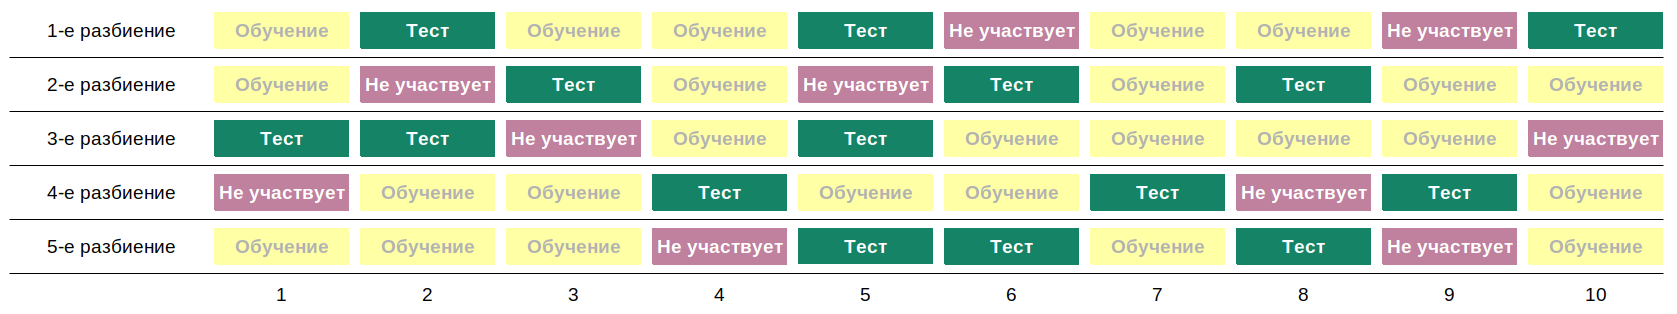

In [72]:
from sklearn.model_selection import ShuffleSplit

# Давайте, используя метод кросс-валидации ShuffleSplit(), оценим качество модели LogisticRegression на датасете 'iris'

from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Загрузка данных
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.drop('target', axis=1)
y = df['target']

shuffle_split = ShuffleSplit(test_size=0.2, train_size=0.8, n_splits=10, random_state=12345)
model_lr = LogisticRegression(max_iter=200)

scores = cross_val_score(model_lr, X, y, cv=shuffle_split)

print('Значения правильности предсказаний перекрёстной проверки:\n{}'.format(scores))


# В данном примере произошло 10 разбиений. 
# В каждом разбиении 80% данных использовалось для тренировки модели и 20% - для тестирования модели.

# Отметим также, чтобы использовать перекрестную проверку со случайными перестановками, 
# экземляр класса  ShuffleSplit() был передан параметру cv функции cross_val_score().

Значения правильности предсказаний перекрёстной проверки:
[0.96666667 0.96666667 0.96666667 1.         1.         0.93333333
 0.96666667 1.         0.93333333 0.9       ]


In [73]:
# Опробуем этот метод кросс-валидации в его стихии - на большом наборе данных. 

# Для этого создадим набор данных:

from sklearn.datasets import make_regression

# Генерируем набор данных для регрессии со 100.000.000 образцами и 2 признаками
X, y = make_regression(n_samples=100_000_000, n_features=2, noise=10, random_state=12345)

In [74]:
# Используя KFold кросс-валидацию, оценим качество модели линейной регрессии на этом датасете:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import time

# Инициализируем модель
model = LinearRegression()

# Используем отрицательную среднеквадратическую ошибку
start_time = time.time()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
end_time = time.time()

print(scores)
print('Время выполнения кросс-валидации: {:.2f} секунд'.format(end_time - start_time))

[-100.01789373  -99.98678109 -100.01898097  -99.99803722 -100.00699065]
Время выполнения кросс-валидации: 32.12 секунд


In [75]:
# Теперь проделаем то же самое, но используем кросс-валидацию с ShuffleSplit(). 
# На этот раз для оценки моделей будем работать не со всеми 100 миллионами строк, 
# а возьмём для обучения лишь 0,5% от всего объёма данных, а для тестирования - 0,1%:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import time

shuffle_split = ShuffleSplit(test_size=0.001, train_size=0.005, n_splits=5, random_state=12345)
model = LinearRegression()

start_time = time.time()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=shuffle_split)
end_time = time.time()

print(scores)
print('Время выполнения кросс-валидации: {:.2f} секунд'.format(end_time - start_time))

# В этом случае на проведение кросс-валидации потребовалось меньше времени.

[ -99.39796111  -99.82827038 -100.17515465  -99.9150001  -100.31277851]
Время выполнения кросс-валидации: 37.20 секунд


In [76]:
# Основной недостаток метода ShuffleSplit раскрывается в работе с задачами классификации на данных с несбалансированными классами.
#  
# При несбалансированных классах ShuffleSplit может случайно создать тренировочные и тестовые выборки, 
# в которых одни классы будут сильно преобладать, а другие - практически отсутствовать. 

# В таком случае модель будет учиться на данных, которые не отражают реальное распределение классов, 
# и может склоняться к предсказанию более частых классов, игнорируя редкие.

In [77]:
# Для решения задач классификации для данных с несбалансированными классами предусмотрен метод StratifiedShuffleSplit.

In [78]:
# Несбалансированные данные (или несбалансированные выборки) - это ситуация, 
# когда в наборе данных классы или категории представлены неравномерно. 

# В задачах классификации это означает, что один или несколько классов имеют значительно больше или меньше примеров по сравнению с другими.

# Например, в задаче бинарной классификации по выявлению мошеннических транзакций 
# может быть 99% легальных транзакций и только 1% мошеннических. 

# Здесь данные сильно смещены в сторону одного класса (легальных транзакций), что создаёт проблему несбалансированности.

In [79]:
# Основные проблемы несбалансированных данных:

# Смещение модели: 
# Модели склонны учиться предсказывать доминирующий класс, поскольку это позволяет им достичь высокой общей точности, 
# даже если они почти всегда игнорируют минорный класс.

# Переобучение на частый класс: 
# Модель может переобучаться на частый класс и недоучиваться на редкий, 
# что снижает её способность корректно классифицировать наблюдения минорного класса.

# Низкая производительность на минорном классе: 
# Метрики вроде общей точности могут вводить в заблуждение, 
# так как модель может показывать высокую точность, просто предсказывая доминирующий класс.
#  
# Важно использовать такие метрики, как точность (precision), полнота (recall) и F1-мера, особенно для минорного класса.

In [80]:
# Стратегии работы с несбалансированными данными:

# Стратифицированная кросс-валидация: 
# Как уже обсуждалось ранее, помогает сохранить пропорции классов в блоках при разбиении данных, что способствует более надёжной оценке модели.

# Пере/недо-сэмплирование: 
# Увеличение количества примеров минорного класса (oversampling) или уменьшение числа примеров мажорного класса (undersampling).

# Использование весов классов: 
# Присвоение большего веса минорному классу, чтобы модель обучалась с учётом важности редкого класса.

# Создание синтетических данных: 
# Методы вроде SMOTE (Synthetic Minority Over-sampling Technique) создают новые примеры минорного класса на основе существующих.

# Несбалансированные данные требуют внимательного подхода к построению и оценке моделей, чтобы избежать искажений и обеспечить надёжные предсказания для всех классов.

## StratifiedShuffleSplit()

In [81]:
# StratifiedShuffleSplit() - это класс в библиотеке scikit-learn, 
# используемый для выполнения стратифицированного случайного разбиения данных на тренировочные и тестовые выборки.
 
# Он сохраняет пропорции категорий в каждой выборке, 
# что особенно важно при работе с несбалансированными данными, 
# когда одни классы представлены гораздо чаще других.

In [82]:
# Основные параметры StratifiedShuffleSplit():

# n_splits: 
# Количество разбиений, которые необходимо выполнить.

# test_size: 
# Размер тестовой выборки в виде доли (например, 0.2 для 20% данных) или абсолютного числа. 
# Если значение установлено на None, оно автоматически устанавливается как дополнение к размеру обучающей выборки. 
# Если train_size также установлено на None, значение будет установлено на 0.1.

# train_size: 
# Размер тренировочной выборкив виде доли или абсолютного числа. 
# Если указано в виде целого числа, то обозначает абсолютное количество обучающих образцов.

# random_state: 
# Параметр для контроля воспроизводимости разбиений.

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit

# Для демонстрации примера использования StratifiedShuffleSplit(), 
# создадим синтетический набор данных с несбалансированными классами для задачи классификации:

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, 
                           weights=[0.9, 0.1], random_state=12345)

# weights=[0.9, 0.1] означает, что 90% примеров будут принадлежать классу 0 (большинство), 
# а 10% примеров будут принадлежать классу 1 (меньшинство). 

# Проще говоря, у нас будет несбалансированный набор данных, где один класс значительно преобладает над другим.

In [84]:
# Используя StratifiedShuffleSplit(), оценим качество модели случайного леса:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

# Настраиваем StratifiedShuffleSplit для кросс-валидации
splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=12345)

# Создаём модель случайного леса
model = RandomForestClassifier(random_state=12345)

# Проводим кросс-валидацию с использованием StratifiedShuffleSplit
cv_scores = cross_val_score(model, X, y, cv=splitter, verbose=3)

print('Среднее значение правильности кросс-валидации: {:.2f}'.format(cv_scores.mean()))

[CV] END ................................ score: (test=0.963) total time=   0.2s
[CV] END ................................ score: (test=0.963) total time=   0.2s
[CV] END ................................ score: (test=0.967) total time=   0.2s
[CV] END ................................ score: (test=0.957) total time=   0.2s
[CV] END ................................ score: (test=0.953) total time=   0.2s
Среднее значение правильности кросс-валидации: 0.96


In [85]:
# Для сравнения давайте посмотрим на качество модели при кросс-валидации 
# со случайным разбиением без стратификации ShuffleSplit():

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# Настраиваем ShuffleSplit для кросс-валидации
splitter = ShuffleSplit(n_splits=5, test_size=0.3, random_state=12345)

# Создаём модель случайного леса
model = RandomForestClassifier(random_state=12345)

# Проводим кросс-валидацию с использованием ShuffleSplit
cv_scores = cross_val_score(model, X, y, cv=splitter, verbose=3)

print('Среднее значение правильности кросс-валидации с использованием ShuffleSplit: {:.2f}'.format(cv_scores.mean()))

[CV] END ................................ score: (test=0.963) total time=   0.2s
[CV] END ................................ score: (test=0.967) total time=   0.2s
[CV] END ................................ score: (test=0.977) total time=   0.2s
[CV] END ................................ score: (test=0.943) total time=   0.2s
[CV] END ................................ score: (test=0.973) total time=   0.2s
Среднее значение правильности кросс-валидации с использованием ShuffleSplit: 0.96


In [86]:
# Средняя правильность при перекрёстной проверке оказалась одинаковой в обоих случаях.
#  
# Однако использование StratifiedShuffleSplit даёт уверенность, 
# что при случайном разбиении пропорции классов были сохранены.

# 1.6 GroupKFold

In [87]:
# GroupKFold - это вариант кросс-валидации в scikit-learn, который используется в случаях, 
# когда данные делятся на группы, и необходимо гарантировать, 
# что все наблюдения из одной группы попадают только в один обучающий или тестовый набор. 

# Этот метод полезен, когда данные внутри группы связаны, 
# и их разделение между обучающей и тестовой выборками может привести к переобучению или некорректной оценке модели.

In [88]:
# Вместо обычного разбиения на обучающие и тестовые выборки, как в стандартной кросс-валидации, 
# GroupKFold учитывает группы данных, которые нельзя разрывать. 

# Метод создает разбиение таким образом, что каждая группа попадает либо в обучающий набор, 
# либо в тестовый набор, но никогда не делится между ними.

In [89]:
# Предположим, что у нас есть данные о пациентах, и каждый пациент может иметь несколько записей. 
# Нам важно, чтобы записи одного и того же пациента не оказались и в обучающей, и в тестовой выборках, 
# поскольку это нарушило бы независимость наблюдений. 
# Здесь и пригодится GroupKFold.

In [90]:
# Группы и классы - это разные понятия в машинном обучении.

# Классы - это то, что мы пытаемся предсказать. 
# Например, категория объекта, которую мы определяем: мужчина или женщина.

# Группы - это то, как структурированы наши данные. 
# Они определяют, как данные разделяются при кросс-валидации, 
# но не являются целевой меткой для предсказания.

# Например, задача классификации автомобилей по типу привода:

# Классы: 
# передний привод, задний привод, полный привод.

# Группы: 
# автомобили одного производителя (например, Лада, Toyota, BMW). 
# В# ажно, чтобы данные об автомобилях одной марки не попадали одновременно в тренировочный и тестовый наборы.

In [91]:
# Для демонстрации примера создадим синтетические данные при помощи функции make_blobs() библиотеки scikit-learn:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=90, centers=3, random_state=12345, cluster_std=2.5)

# Вот что делают указанные параметры функции make_blobs():

# n_samples=90: создаёт 90 образцов данных. 
# Это общее количество точек в сгенерированном наборе данных.

# centers=3: указывает, что нужно создать 3 центра кластеров. 
# Эти центры служат для генерации данных, и точки данных будут сгруппированы вокруг этих центров.

# random_state=12345: устанавливает начальное значение генератора случайных чисел для воспроизводимости результата.

# cluster_std=2.5: задаёт стандартное отклонение (ширину) каждого кластера. 
# Чем больше значение, тем шире и разрозненнее будут кластеры. 
# В данном случае, стандартное отклонение равно 2.5, что делает кластеры достаточно разбросанными.

In [92]:
# Посмотрим на содержание полученных выборок:

print(X[:10])
print()
print(y)

[[  8.82459155  -2.96812353]
 [  6.15646124   3.77697666]
 [  9.27980094  -3.10020671]
 [ -7.64346083  -4.76628975]
 [  9.34885576  -2.36305874]
 [-10.235767    -7.3151449 ]
 [  0.67376814   1.86804047]
 [  4.71955576  -3.61702741]
 [ -6.60894428  -0.89955102]
 [  5.93354074  -2.84028212]]

[0 2 0 1 0 1 2 0 1 0 1 0 1 2 0 0 1 1 2 1 2 1 2 2 1 0 0 1 0 0 2 1 2 0 1 1 1
 0 2 0 0 0 2 1 2 0 0 2 2 1 2 0 1 2 2 0 1 0 0 2 1 1 1 1 2 1 1 0 0 1 2 2 0 2
 1 1 1 1 2 2 2 2 0 2 0 2 0 2 0 2]


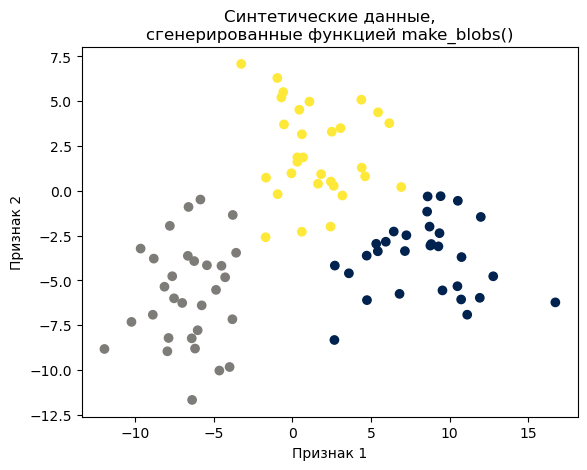

In [93]:
# Для наглядности визуализируем эти данные:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cividis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Синтетические данные,\nсгенерированные функцией make_blobs()')
plt.show();

# Как можем наблюдать, целевая переменная представлена тремя классами.

In [94]:
# Теперь давайте создадим 9 групп, в каждой из которых будет по 10 значений:

import numpy as np

groups = np.array([i // 10 for i in range(90)])

print(groups)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8]


In [95]:
# Воспользуемся моделью случайного леса для выполнения перекрёстной проверки, 
# применяя разбиение данных по методу GroupKFold:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
import pandas as pd

model_rfc = RandomForestClassifier(random_state=12345)

group_kfold = GroupKFold(n_splits=3)

cv_results = cross_validate(model_rfc, X, y, groups=groups, cv=group_kfold, return_train_score=True)

df_results = pd.DataFrame(cv_results)
display(df_results)

# В этом примере для параметра groups функции cross_validate() мы указали соответствующие группы данных, 
# а в качестве значения для параметра cv использовали объект класса GroupKFold().

# Мы также указали параметр n_splits=3 в классе GroupKFold() для проведения трёхблочной перекрёстной проверки. 
# Отметим, что по умолчанию n_splits=5.

,fit_time,score_time,test_score,train_score
0,0.170325,0.01316,0.933333,1.0
1,0.169604,0.00800,0.966667,1.0
2,0.129014,0.00700,1.000000,1.0


In [96]:
# При проведении кросс-валидации с использованием класса GroupKFold() 
# и параметра groups в функциях cross_validate() или cross_val_score(), 
# можно быть уверенным, что на каждой итерации группы данных будут либо в обучающей выборке, 
# либо в тестовой, но никогда в обеих одновременно.

In [97]:
# Посмотреть, как происходит разделение групп на каждой итерации можно при помощи метода split() библиотеки scikit-learn, 
# который используется для разделения набора данных на тренировочные и тестовые выборки по определённым правилам. 

# Не путайте его с питоновским split() - они имеют разный функционал. 
# Питоновский split() делит строки на части, 
# а split() в scikit-learn делит набор данных для машинного обучения на тренировочные и тестовые подвыборки.

# Воспользуемся им, применив его к нашим данным в цикле:

for train_idx, test_idx in group_kfold.split(X, y, groups=groups):    
    print('Обучение на группах:', groups[train_idx])
    print('Тест на группах:', groups[test_idx])
    print()

# split(X, y, groups) генерирует индексы для разделения данных на тренировочные и тестовые наборы.
# На каждой итерации возвращаются новые индексы для обучения и теста. 

# Вы можете использовать эти индексы, чтобы получить соответствующие части данных из X, y и groups.

Обучение на группах: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
Тест на группах: [2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 8 8 8 8 8 8 8 8 8 8]

Обучение на группах: [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5
 5 5 5 6 6 6 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8]
Тест на группах: [1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 7 7 7 7 7 7 7 7 7 7]

Обучение на группах: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5
 5 5 5 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8]
Тест на группах: [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6 6 6]



In [98]:
# Имеется датасет с синтетическими данными, разделенными на признаки X и целевую переменную y. 
# Также сформированы 90 групп (groups), по 10 значений в каждой, и определена модель случайного леса.

# Используя функцию cross_val_score() произведите 3-кратную перекрёстную проверку с применением деления данных GroupKFold. 
# Выведите на печать оценки точности ('accuracy'), полученные в процессе кросс-валидации. 
# На печать выведите просто массив с данными без каких либо дополнительных подписей.

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score

X, y = make_blobs(n_samples=900, centers=3, random_state=12345, cluster_std=2.5)

groups = np.array([i // 10 for i in range(900)])

model = RandomForestClassifier(random_state=12345)

group_kfold = GroupKFold(n_splits=3)

cv_scores = cross_val_score(model, X, y, groups=groups, cv=group_kfold)

print(cv_scores)

[0.96333333 0.94666667 0.94666667]


In [99]:
# Имеется датасет с синтетическими данными, разделенными на признаки X и целевую переменную y. 
# Также сформированы 90 групп (groups), по 10 значений в каждой, и определена модель случайного леса.

# Используя функцию cross_validate() произведите 3-кратную перекрёстную проверку с применением деления данных GroupKFold.

# Выведите на печать сначала массив с оценками точности ('accuracy') на обучающих наборах данных, 
# а на следующей строке - массив с оценками точности на тестовых (валидационных) наборах данных, 
# полученными в процессе кросс-валидации. На печать выведите просто массивы с данными без каких либо дополнительных подписей.

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate

X, y = make_blobs(n_samples=900, centers=3, random_state=12345, cluster_std=2.5)

groups = np.array([i // 10 for i in range(900)])

model = RandomForestClassifier(random_state=12345)

group_kfold = GroupKFold(n_splits=3)

cv_result = cross_validate(model, X, y, groups=groups, cv=group_kfold, return_train_score=True)

print(cv_result['train_score'])
print(cv_result['test_score'])

[1. 1. 1.]
[0.96333333 0.94666667 0.94666667]


# 1.7 TimeSeriesSplit

In [100]:
# В отличие от традиционных методов кросс-валидации, где данные случайным образом разделяются на тренировочные и тестовые выборки, 
# TimeSeriesSplit учитывает временную структуру данных, что делает его незаменимым в ряде задач, связанных с временными рядами, 
# будь то финансовые прогнозы, анализ климатических данных или моделирование продаж.

# Основная концепция TimeSeriesSplit заключается в постепенном увеличении тренировочной выборки, 
# оставляя тестовую часть неизменной.

# Мы начинаем с небольшого фрагмента данных, обучаем модель, а затем добавляем новые данные, продвигаясь вперед во времени. 
# Каждое разбиение гарантирует, что модель обучается только на прошлом, избегая утечек информации из будущего.

In [101]:
# Рассмотрим пример. 
# Сначала модель обучается на первых нескольких временных периодах, 
# а затем тестируется на следующем фрагменте. 
# После этого тренировочный набор увеличивается, захватывая больше данных, 
# и снова проводится тестирование. 
# Такой подход позволяет постепенно накапливать информацию и адаптировать модель к новым временным данным.

# Таким образом, TimeSeriesSplit не просто разрезает данные - он создает динамическую модель, 
# которая учится на последовательности событий, отражая реальный ход времени. 
# Это делает данный метод незаменимым в ситуациях, где временная зависимость играет ключевую роль.

In [102]:
from sklearn.model_selection import TimeSeriesSplit

# Для примера, создадим следующий массив:

import numpy as np

X = np.arange(20).reshape(20, 1)   

print(X)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


In [103]:
# Применим класс TimeSeriesSplit к этому массиву с параметрами по умолчанию 
# и посмотрим, как он делит данные на отдельные сегменты.

from sklearn.model_selection import TimeSeriesSplit 

tscv = TimeSeriesSplit()

# Вывод разбиений
for train_index, test_index in tscv.split(X):
    print('TRAIN:', train_index, '\n', 'TEST:', test_index)
    print()

TRAIN: [0 1 2 3 4] 
 TEST: [5 6 7]

TRAIN: [0 1 2 3 4 5 6 7] 
 TEST: [ 8  9 10]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] 
 TEST: [11 12 13]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 
 TEST: [14 15 16]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 
 TEST: [17 18 19]



In [104]:
# Параметры TimeSeriesSplit:

# n_splits: 
# Это количество разбиений, на которые будет разделён временной ряд. 
# Чем больше разбиений, тем меньше данных останется для каждой тестовой выборки на каждой итерации. 
# По умолчанию n_splits=5.

# max_train_size: 
# Определяет максимальный размер обучающей выборки на каждой итерации. 
# Если не указано, обучающая выборка будет расти с каждым фолдом, 
# захватывая все больше данных, начиная с самого начала временного ряда. 
# Полезно использовать, если нужно ограничить размер обучающей выборки, 
# например, чтобы избежать переобучения на слишком большом объёме данных.

# test_size: 
# Явно задаёт размер тестовой выборки. 
# Если не указано, то тестовая выборка будет выбрана автоматически 
# в зависимости от количества данных и числа разбиений.

# gap: 
# Позволяет указать "разрыв" (пропуск) между обучающей и тестовой выборками. 
# Этот параметр актуален для временных рядов, где важно, 
# чтобы модель не использовала последние данные из обучающей выборки для предсказания ближайших данных в тестовой выборке. 
# По умолчанию gap=0.

In [105]:
# Давайте для примера произведем разделение данных со следующими параметрами:

# n_splits=5: пять разбиений;
# max_train_size=10: ограничивает количество данных в обучающей выборке до 10 на каждой итерации;
# test_size=2: каждая тестовая выборка будет состоять из 2 элементов;
# gap=1: пропускает один элемент между обучающей и тестовой выборками.

from sklearn.model_selection import TimeSeriesSplit  

tscv = TimeSeriesSplit(n_splits=5, max_train_size=10, test_size=2, gap=1)

# Вывод разбиений
for train_index, test_index in tscv.split(X):
    print('TRAIN:', train_index, '\n', 'TEST:', test_index)
    print()

TRAIN: [0 1 2 3 4 5 6 7 8] 
 TEST: [10 11]

TRAIN: [ 1  2  3  4  5  6  7  8  9 10] 
 TEST: [12 13]

TRAIN: [ 3  4  5  6  7  8  9 10 11 12] 
 TEST: [14 15]

TRAIN: [ 5  6  7  8  9 10 11 12 13 14] 
 TEST: [16 17]

TRAIN: [ 7  8  9 10 11 12 13 14 15 16] 
 TEST: [18 19]



In [106]:
# Изменим количество разбиений с 5 на 3:

from sklearn.model_selection import TimeSeriesSplit  

tscv = TimeSeriesSplit(n_splits=3, max_train_size=10, test_size=2, gap=1)

# Вывод разбиений
for train_index, test_index in tscv.split(X):
    print('TRAIN:', train_index, '\n', 'TEST:', test_index)
    print()

TRAIN: [ 3  4  5  6  7  8  9 10 11 12] 
 TEST: [14 15]

TRAIN: [ 5  6  7  8  9 10 11 12 13 14] 
 TEST: [16 17]

TRAIN: [ 7  8  9 10 11 12 13 14 15 16] 
 TEST: [18 19]



In [107]:
# А теперь давайте используем TimeSeriesSplit с перекрёстной проверкой. 
# Для этого сначала создадим временной ряд:

import pandas as pd
from sklearn.datasets import make_regression

# Создаем даты
dates = pd.date_range(start='2024-01-01', periods=100, freq='D')

# Генерируем данные
X, y = make_regression(n_samples=100, n_features=3, 
                       noise=30, bias=30, random_state=12345)

# Создаем DataFrame с признаками
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, X.shape[1] + 1)],
                 index=dates)
display(X)

,feature_1,feature_2,feature_3
2024-01-01,0.804223,2.010390,-0.156736
2024-01-02,-1.022487,0.220487,-0.402827
2024-01-03,-0.152986,-0.132609,-0.751921
2024-01-04,1.320566,-0.653438,0.507965
2024-01-05,0.702110,-0.139142,-0.274569
...,...,...,...
2024-04-05,-0.867136,-0.437030,0.383583
2024-04-06,-0.193401,-1.648985,0.669158
2024-04-07,1.669025,-0.539741,-0.438570
2024-04-08,0.670216,-0.955869,0.852965


In [108]:
# Создаем Series с целевой переменной
y = pd.Series(y, index=dates)

display(y)

2024-01-01    260.526249
2024-01-02     10.190919
2024-01-03      2.849147
2024-01-04     61.164770
2024-01-05     18.449419
                 ...    
2024-04-05     16.299973
2024-04-06    -60.278402
2024-04-07    -37.212826
2024-04-08     63.533924
2024-04-09    -22.833225
Freq: D, Length: 100, dtype: float64

In [109]:
# А теперь произведём кросс-валидацию с применением TimeSeriesSplit для модели линейной регрессии:

tscv = TimeSeriesSplit(n_splits=3, max_train_size=50, test_size=10)

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=tscv)

print(f'Оценки качества модели: {scores}')
print(f'Средняя оценка качества: {scores.mean():.4f}')

Оценки качества модели: [0.98751797 0.90231549 0.88341101]
Средняя оценка качества: 0.9244


In [110]:
# Применение TimeSeriesSplit поможет вам оценивать модели в условиях, приближенных к реальным сценариям, 
# что особенно важно при работе с предсказанием временных рядов, где точность модели сильно зависит от корректной валидации. 

# Опираясь на этот метод, вы сможете лучше понимать, как модель будет вести себя при работе с новыми данными и сможете избежать ошибок, 
# связанных с неверной оценкой ее производительности.

# 1.8 learning_curve()

In [111]:
# Функция learning_curve() библиотеки scikit-learn позволяет оценить, 
# как меняется производительность модели по мере увеличения объёма обучающей выборки. 

# Она помогает увидеть, как качество модели возрастает с добавлением новых данных, 
# что полезно для понимания того, достаточно ли текущих данных для обучения 
# или стоит собрать их побольше для достижения лучших результатов.

# То есть, говоря простым языком, функция learning_curve() помогает понять, как ведет себя модель, 
# когда ей подкидываешь всё больше и больше данных для обучения.

In [112]:
# Функция learning_curve() возвращает следующие значения:

# train_sizes_abs: 
# Фактическое количество примеров в обучающей выборке для каждого размера из train_sizes.

# train_scores: 
# Массив значений метрик на обучающих наборах для каждого размера выборки.

# test_scores: 
# Массив значений метрик на тестовых наборах для каждого размера выборки.

# fit_times (опционально, если return_times=True): 
# Время, затраченное на обучение для каждой комбинации.

# score_times (опционально, если return_times=True): 
# Время, затраченное на оценку модели для каждой комбинации.

In [113]:
from sklearn.model_selection import learning_curve

# Давайте рассмотрим работу функции learning_curve() на примере данных об ирисах.

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

display(df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [114]:
X = df.drop('target', axis=1)
y = df['target']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [115]:
# Разделим данные на тренировочные и тестовые выборки:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(120, 4)
(30, 4)
(120,)
(30,)


In [116]:
# Для демонстрации работы функции learning_curve() будем использовать модель случайного леса. 
# Поэтому сначала создадим объект класса RandomForestClassifier():

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=12345)

In [117]:
# Теперь передадим модель и тренировочные выборки в функцию learning_curve() и посмотрим на результат:

from sklearn.model_selection import learning_curve

lc = learning_curve(model, X_train, y_train)

print(lc)

(array([ 9, 31, 52, 74, 96]), array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]]), array([[0.875     , 0.83333333, 0.79166667, 0.91666667, 0.875     ],
       [0.91666667, 0.95833333, 0.95833333, 0.91666667, 0.91666667],
       [1.        , 1.        , 1.        , 0.91666667, 0.91666667],
       [1.        , 1.        , 0.95833333, 0.91666667, 0.91666667],
       [1.        , 1.        , 0.95833333, 0.875     , 0.95833333]]))


In [118]:
# В результате мы получаем кортеж, состоящий из трех массивов. 
# Изменим код, чтобы сразу распаковать этот кортеж:

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train)

In [119]:
# В итоге результатом работы функции learning_curve() являются три переменные.

# Переменная train_sizes содержит массив с фактическим количеством примеров в обучающей выборке:

print(train_sizes)
print()

# Переменная train_scores содержит массив со значениями метрик на обучающих наборах для каждого размера выборки:

print(train_scores)
print()

# А в переменной test_scores находится массив со значениями метрик на тестовых наборах для каждого размера выборки:

print(test_scores)

[ 9 31 52 74 96]

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[0.875      0.83333333 0.79166667 0.91666667 0.875     ]
 [0.91666667 0.95833333 0.95833333 0.91666667 0.91666667]
 [1.         1.         1.         0.91666667 0.91666667]
 [1.         1.         0.95833333 0.91666667 0.91666667]
 [1.         1.         0.95833333 0.875      0.95833333]]


In [120]:
# Механизм работы learning_curve() следующий:

# Разбиение на подвыборки:
# Сначала learning_curve() делит весь тренировочный набор данных (полученный нами после train_test_split()) 
# на несколько подвыборок разных размеров, начиная с малого количества данных и постепенно увеличивая их размер до полной обучающей выборки.

# Кросс-валидация: 
# Для каждой подвыборки данных функция использует кросс-валидацию. 
# В этом процессе данные дополнительно делятся на тренировочные и валидационные подмножества 
# (по умолчанию применяется 5-блочная перекрёстная проверка). 
# Модель обучается на тренировочном подмножестве и тестируется на валидационном подмножестве.

# Оценка производительности: 
# Значения train_scores показывают производительность модели на тех данных, 
# на которых она обучалась в процессе кросс-валидации (т.е. на тренировочных подмножествах). 
# Значения test_scores отражают производительность модели на валидационных подмножествах, 
# которые выступают как тестовые данные для оценки обобщающей способности модели.

In [121]:
# Таким образом, несмотря на то что learning_curve() получает только тренировочные данные, 
# она сама внутри процесса кросс-валидации выделяет из них валидационные подмножества, 
# на которых и оценивается производительность модели, чтобы вернуть test_scores. 
# Эти test_scores помогают понять, как модель ведёт себя на данных, которые она не видела в процессе обучения, 
# и поэтому они важны для оценки её обобщающей способности.

[1. 1. 1. 1. 1.]
[0.85833333 0.93333333 0.96666667 0.95833333 0.95833333]


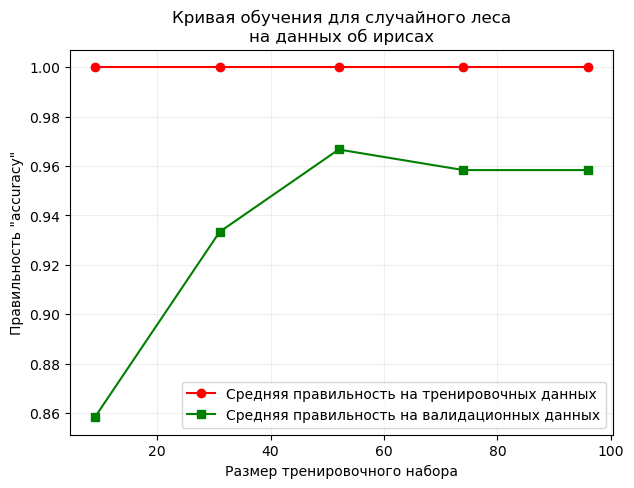

In [122]:
# Можем визуализировать информацию train_sizes, train_scores, test_scores.

# Сначала мы посчитаем средние значения метрик, полученных на тренировочных и валидационных данных, для всех подвыборок:

import numpy as np

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print(train_scores_mean)
print(test_scores_mean)

# А затем передадим эти средние значения и размеры подвыборок функции plot() библиотеки matplotlib для построения графиков:

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', 
         label='Средняя правильность на тренировочных данных')
plt.plot(train_sizes, test_scores_mean, 's-', color='g', 
         label='Средняя правильность на валидационных данных')

plt.title('Кривая обучения для случайного леса\nна данных об ирисах')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Правильность "accuracy"')
plt.legend()
plt.grid(alpha=0.2)
plt.show();

# Теперь мы можем визуально оценить влияние размера тренировочного набора данных 
# на правильность предсказаний перекрёстной проверки.

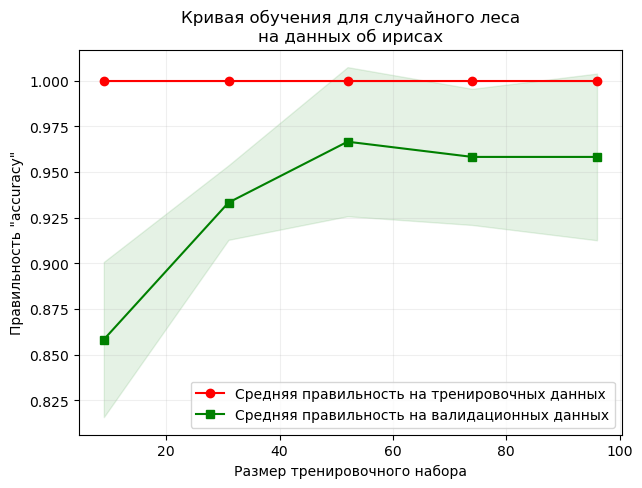

In [123]:
# На этот график можно добавить, например, границы стандартных отклонений для каждой точки. 

# Посчитаем средние значения и стандартные отклонения:

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# И добавим на график границы стандартных отклонений при помощи функции fill_between() библиотеки matplotlib:

plt.figure(figsize=(7, 5))

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Средняя правильность на тренировочных данных')
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color='r')

plt.plot(train_sizes, test_scores_mean, 's-', color='g', label='Средняя правильность на валидационных данных')
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color='g')

plt.title('Кривая обучения для случайного леса\nна данных об ирисах')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Правильность "accuracy"')
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.show();

# Если кривая показывает, что даже с большим количеством данных качество модели не сильно улучшается, 
# значит, вам нужно не больше данных, а что-то поменять в самой модели.

In [124]:
# Параметры функции learning_curve():

# estimator: 
# Модель, которую необходимо оценить.

# X: 
# Данные, используемые для обучения модели.

# y: 
# Целевая переменная для задач обучения с учителем.

# groups: 
# Массив групповых меток, используемый для группировки выборок при разбиении данных в кросс-валидации.

# train_sizes: 
# Массив значений (или долей) размеров обучающей выборки, для которых нужно построить кривую обучения. 

# По умолчанию используется np.linspace(0.1, 1.0, 5), т.е.  [0.1, 0.33, 0.55, 0.78, 1.0].

# cv: 
# Определяет стратегию разбиения данных для перекрёстной проверки. По умолчанию используется 5-блочная кросс-валидация.

# scoring: 
# Стратегия для оценки производительности модели. По умолчанию используется правильность 'accuracy' для классификации и R^2 для регрессии.

# exploit_incremental_learning: 
# Если True, используется метод partial_fit у инкрементальной модели (например, SGDClassifier), 
# что позволяет учиться на данных поступательно, увеличивая размер обучающего набора, 
# и это может значительно ускорить обучение на больших наборах данных (по умолчанию exploit_incremental_learning=False).
# Incremental learning (инкрементальное или пошаговое обучение) - это подход к обучению моделей машинного обучения, при котором данные подаются частями, 
# а модель обновляется по мере поступления новых данных. Это может быть востребовано в случаях, 
# когда невозможно обучить модель на всём наборе данных сразу из-за ограничений по памяти или времени.

# n_jobs: 
# Количество параллельных задач. -1 использует все доступные процессоры.

# pre_dispatch: 
# Управляет количеством задач, которые можно создать в параллельном выполнении.

# verbose: 
# Уровень подробности вывода. Чем больше значение, тем больше сообщений будет отображаться.

# shuffle: 
# Если True, данные перемешиваются перед разделением на обучающие наборы, что помогает снизить влияние порядка данных на результаты (по умолчанию shuffle=False).

# random_state: 
# Начальное значение для генератора случайных чисел, что делает перемешивание данных повторяемым.

# error_score: 
# Какой результат вернуть, если модель не может обучиться на определенном наборе данных. Можно задать 'raise' (для выбрасывания ошибки) или числовое значение.

# return_times: 
# Если True, функция возвращает время, затраченное на обучение и оценку для каждой комбинации (по умолчанию return_times=False).

# fit_params: 
# Дополнительные параметры, которые будут переданы в метод fit модели.

In [125]:
# параметр train_sizes функции learning_curve()

# Параметр train_sizes определяет количество обучающих примеров, которые будут использоваться для построения кривой обучения на каждом шаге.


# Параметр train_sizes может принимать следующие значения:

# Массив или список чисел: 
# Вы можете передать массив или список с конкретными числами, 
# которые представляют количество обучающих примеров, используемых на каждом шаге. 
# Например, [50, 100, 150] укажет использовать 50, 100 и 150 примеров соответственно.

# Дробные значения: 
# Вы можете задать train_sizes в виде долей от общего числа обучающих примеров. 
# Например, [0.1, 0.5, 1.0] будет означать, что сначала будет использовано 10% данных, затем 50%, и, наконец, все данные.

# Количество разбиений (целое число): 
# Если передать целое число, например, 10, learning_curve автоматически создаст равномерно распределенные разбиения обучающей выборки, 
# используя это количество разбиений (например, [0.1, 0.2, ..., 1.0]).

# Если train_sizes не указано, то по умолчанию используется np.linspace(0.1, 1.0, 5), что соответствует [0.1, 0.33, 0.55, 0.78, 1.0].

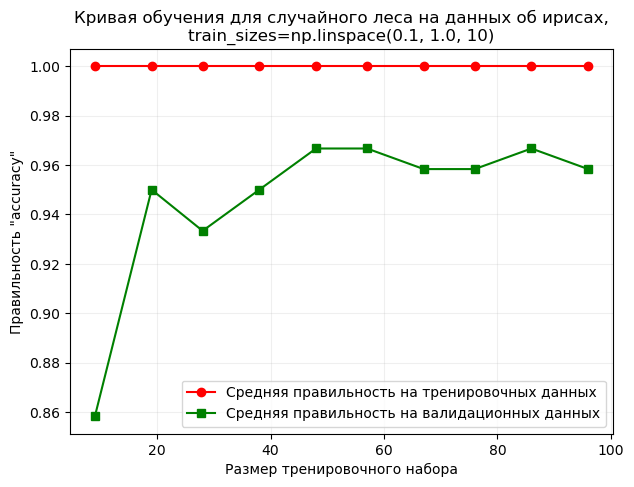

In [126]:
# Например, используем разбиение на 10 подвыборок train_sizes=np.linspace(0.1, 1.0, 10):

model = RandomForestClassifier(n_estimators=100, random_state=12345)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# И построим график:

plt.figure(figsize=(7, 5))

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Средняя правильность на тренировочных данных')
plt.plot(train_sizes, test_scores_mean, 's-', color='g', label='Средняя правильность на валидационных данных')

plt.title('Кривая обучения для случайного леса на данных об ирисах,\ntrain_sizes=np.linspace(0.1, 1.0, 10)')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Правильность "accuracy"')
plt.legend()
plt.grid(alpha=0.2)
plt.show();

In [127]:
# Как видим, теперь на графике отображаются по десять точек на каждой линии.

# Теперь давайте взглянем на размеры получившихся тренировочных подвыборок:

print(train_sizes)

[ 9 19 28 38 48 57 67 76 86 96]


In [128]:
# Мы использовали следующее разбиение:

print(np.linspace(0.1, 1.0, 10))

# Так как в нашем обучающем наборе (X_train) всего 120 примеров, то, вроде как, должно было произойти следующее разбиение:

print(np.linspace(12, 120, 10))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 12.  24.  36.  48.  60.  72.  84.  96. 108. 120.]


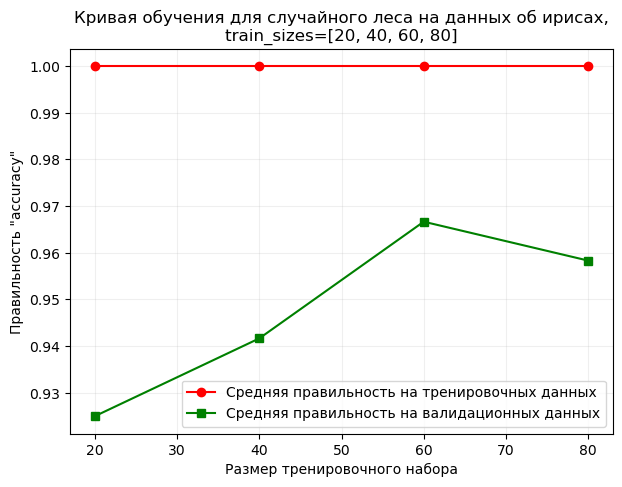

In [129]:
# Параметру train_sizes можно также передавать список с конкретными значениями. 
# Например, передадим параметру train_sizes список [20, 40, 60, 80]:

model = RandomForestClassifier(n_estimators=100, random_state=12345)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                        train_sizes=[20, 40, 60, 80])
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(7, 5))

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Средняя правильность на тренировочных данных')
plt.plot(train_sizes, test_scores_mean, 's-', color='g', label='Средняя правильность на валидационных данных')

plt.title('Кривая обучения для случайного леса на данных об ирисах,\ntrain_sizes=[20, 40, 60, 80]')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Правильность "accuracy"')
plt.legend()
plt.grid(alpha=0.2)
plt.show();

In [130]:
# параметр return_times функции learning_curve()

# Параметр return_times функции learning_curve() используется для возврата времени, 
# затраченного на обучение и оценку модели на каждом шаге кривой обучения.

# Когда return_times=True, функция learning_curve() возвращает дополнительные массивы с временем обучения и 
# оценки на каждом размере обучающей выборки (т.е. возвращает не три массива, а пять). 
# Эти данные могут быть полезны для анализа эффективности алгоритма и для выбора оптимального размера обучающей выборки с учетом времени обучения.

In [131]:
# Например:

model = RandomForestClassifier(n_estimators=100, random_state=12345)

train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(model, X_train, y_train, 
                                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                                        return_times=True)

print('Время, затраченное на обучение для каждой комбинации:')
print(fit_times)

print()

print('Время, затраченное на оценку модели для каждой комбинации')
print(score_times)

Время, затраченное на обучение для каждой комбинации:
[[0.12107778 0.12479472 0.12906766 0.12154245 0.12373209]
 [0.129215   0.12553239 0.13066196 0.13157201 0.13435626]
 [0.1178503  0.12662005 0.12616634 0.12552524 0.11625791]
 [0.1269393  0.1325047  0.13198447 0.1367259  0.13110423]
 [0.13324976 0.1348989  0.13001037 0.1293242  0.12660289]
 [0.12422943 0.13155079 0.12836313 0.11677074 0.12644839]
 [0.13883972 0.11953402 0.13208866 0.13673353 0.12590432]
 [0.1426177  0.13923836 0.13373256 0.13569832 0.13253593]
 [0.12891722 0.13396549 0.12978029 0.13142467 0.13256288]
 [0.13030767 0.1496501  0.13024712 0.13054442 0.13129735]]

Время, затраченное на оценку модели для каждой комбинации
[[0.01550674 0.00900269 0.00836468 0.01463914 0.00964189]
 [0.00854802 0.00800014 0.00852013 0.00099778 0.00853872]
 [0.01565862 0.0087533  0.00900102 0.00776958 0.01699257]
 [0.01362729 0.00840807 0.0086987  0.00765657 0.00900054]
 [0.         0.         0.00900102 0.00841594 0.00739789]
 [0.0089972  0.0

In [132]:
# параметр shuffle функции learning_curve()

# Параметр shuffle используется для перемешивания данных перед разделением на обучающие подвыборки. 
# Это важный аспект, особенно когда данные отсортированы или сгруппированы по определённым категориям, 
# что может повлиять на обучаемость модели и оценку её качества.

# Если shuffle=True, то рекомендуется также установить параметр random_state в learning_curve(), 
# чтобы перемешивание было воспроизводимым.

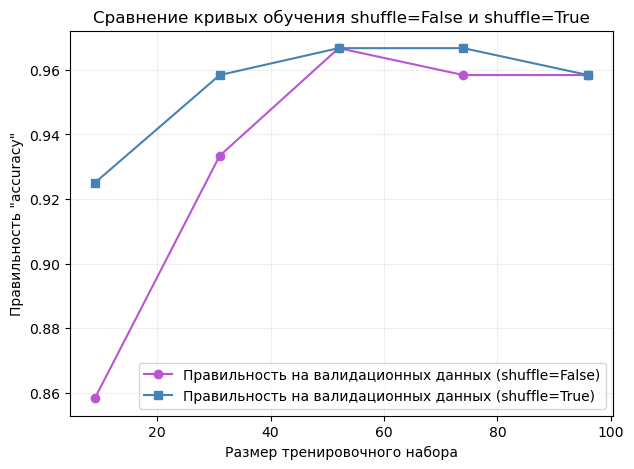

In [133]:
# Давайте сравним результаты работы функции learning_curve() без перемешивания и с перемешиванием данных:

model = RandomForestClassifier(n_estimators=100, random_state=12345)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train)

train_sizes_shuffle, train_scores_shuffle, test_scores_shuffle = learning_curve(model, X_train, y_train,
                                                                                shuffle=True,
                                                                                random_state=12345)

# Вычисляем средние значения:

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_scores_mean_shuffle = np.mean(train_scores_shuffle, axis=1)
test_scores_mean_shuffle = np.mean(test_scores_shuffle, axis=1)

# И строим графики:

plt.figure(figsize=(7, 5))

plt.plot(train_sizes, test_scores_mean, 
         'o-', color='MediumOrchid', label='Правильность на валидационных данных (shuffle=False)')
plt.plot(train_sizes_shuffle, test_scores_mean_shuffle, 
         's-', color='SteelBlue', label='Правильность на валидационных данных (shuffle=True)')

plt.title('Сравнение кривых обучения shuffle=False и shuffle=True')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Правильность "accuracy"')
plt.legend()
plt.grid(alpha=0.2)
plt.show();

# Как можем наблюдать, перемешивание данных немного улучшило предсказательную способность моделей.

# 1.9  validation_curve()

In [134]:
# Функция validation_curve() из модуля sklearn.model_selection позволяет оценить влияние изменения гиперпараметра модели 
# на ее производительность, предоставляя возможность визуально определить, как изменяются метрики модели 
# при различных значениях одного конкретного гиперпараметра. 

# То есть функция validation_curve() позволяет посмотреть, 
# как ведёт себя модель при различных настройках. 
# Это полезный инструмент для выбора оптимального значения гиперпараметра.

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from keras.wrappers.scikit_learn import KerasClassifier

# Достаточно интересная и полезная функция, ведь она может принимать не только числовые параметры, но и строковые:

model = SVC()

# Параметр для проверки: 'kernel'
param_name = "kernel"
param_range = ["linear", "poly", "rbf", "sigmoid"]

train_scores, test_scores = validation_curve(
    model, X, y, param_name=param_name, param_range=param_range, cv=5, scoring="accuracy"
)

# А это даёт возможность быстрого поиска оптимальных гиперпараметров/функций в глубоком обучении:

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

param_name = "activation"
param_range = ["relu", "sigmoid", "tanh", "linear"]

train_scores, test_scores = validation_curve(
    model, X, y, param_name=param_name, param_range=param_range, cv=5, scoring="accuracy"
)

ModuleNotFoundError: No module named 'tensorflow'